In [1]:
from importlib import reload
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

sys.path.append('../../src')
import analyze
import raybay

In [2]:
# Load treatment plan results
sample = np.load('sample/res_linear_dummy_minimize.pkl', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
sample.goal_df = pd.read_csv('goals.csv') 
sample.func_df = pd.read_csv('sample/funcs.csv')
pickle.dump(sample, open('sample/res_linear_dummy_minimize.pkl', 'wb'))

In [4]:
sample.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,ChestWall,MaxDvh,AtMost,3000,1.94
1,D2cm,MaxDose,AtMost,3000,NaN
2,Esophagus,MaxDvh,AtMost,1880,19.97
3,Lung_Total-GTV,MaxDvh,AtMost,1160,56.63
4,Lung_Total-GTV,MaxDvh,AtMost,1240,37.76
5,PTV,MinDvh,AtLeast,4800,95.00
6,PTV,MaxDose,AtMost,8000,NaN
7,Ribs,MaxDvh,AtMost,3200,2.13
8,Ribs,MaxDose,AtMost,4000,NaN
9,SpinalCanal,MaxDvh,AtMost,1360,1.99


In [5]:
sample.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,ChestWall,MaxDvh,"[0,3000]",1.94,NaN,1
1,D2cm,MaxDose,"[0,3000]",0.00,NaN,1
2,Esophagus,MaxDvh,"[0,1880]",19.97,NaN,1
3,Lung_Total-GTV,MaxDvh,"[0,1160]",56.63,NaN,1
4,Lung_Total-GTV,MaxDvh,"[0,1240]",37.76,NaN,1
5,PTV,MinDvh,4800,95.00,NaN,1
6,PTV,MaxDose,"[4801,8000]",0.00,NaN,1
7,Ribs,MaxDvh,"[0,3200]",2.13,NaN,1
8,Ribs,MaxDose,"[0,4000]",0.00,NaN,1
9,SpinalCanal,MaxDvh,"[0,1360]",1.99,NaN,1


In [6]:
# Filter by flag = 0
idx_0 = np.where(np.array(sample.flag_list) == 0)[0]
goal_dict = {ii: np.array(sample.goal_dict[ii])[idx_0] for ii in sample.goal_dict}
par_list = np.array(sample.opt_result.x_iters)[idx_0,:]

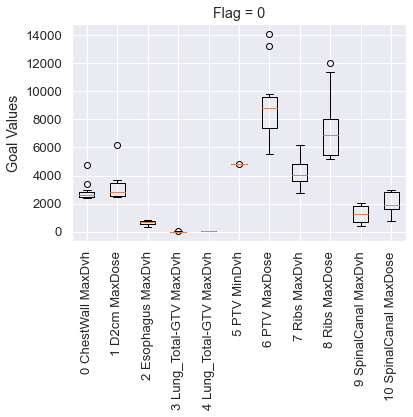

In [7]:
analyze.boxplot(sample.goal_df, goal_dict, 'goals', title='Flag = 0')

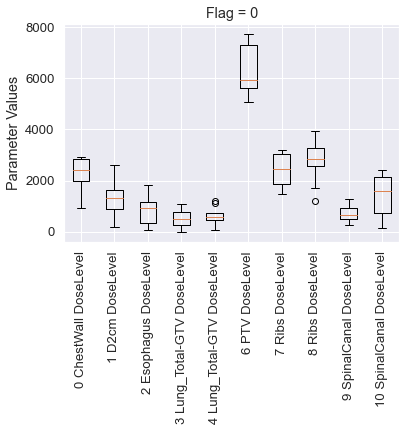

In [8]:
analyze.boxplot(sample.func_df, par_list, 'pars', title='Flag = 0')

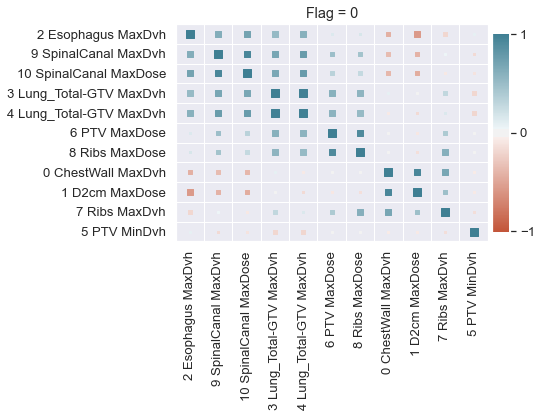

In [9]:
analyze.corrplot(sample.goal_df, goal_dict, title='Flag = 0')

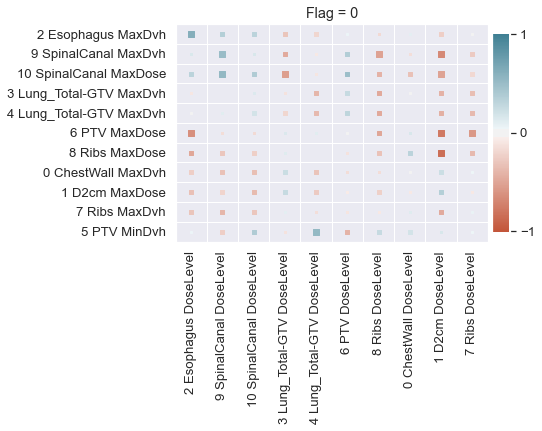

In [10]:
analyze.corrplot(sample.goal_df, goal_dict, sample.func_df, par_list, title='Flag = 0')

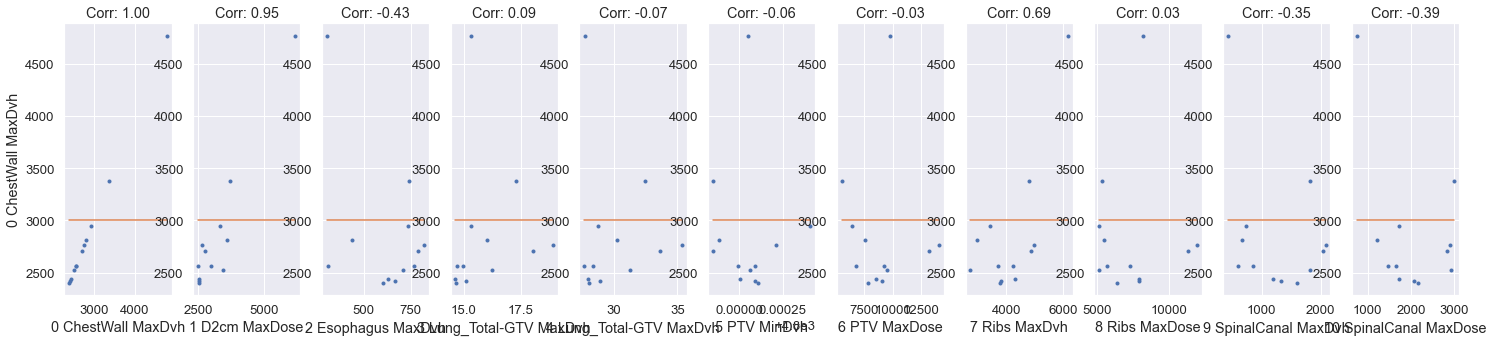

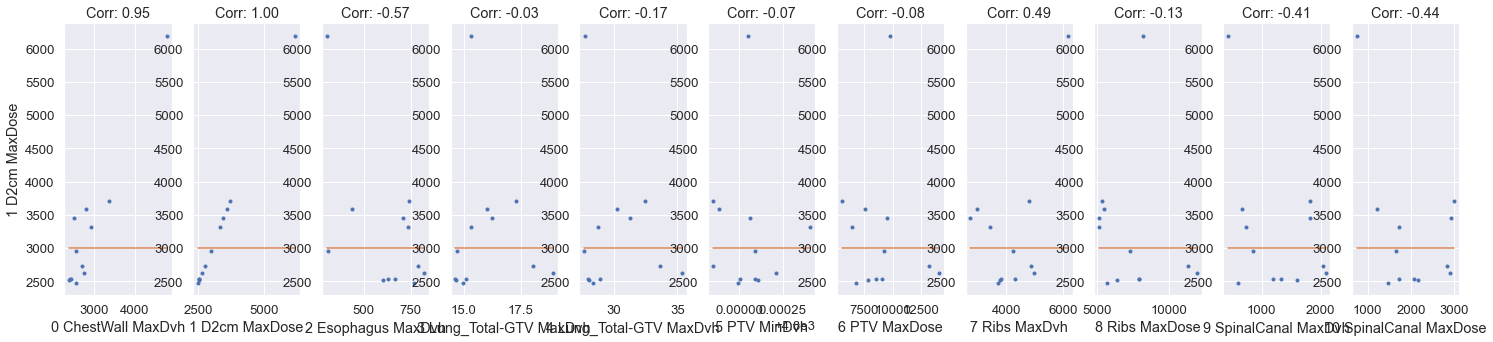

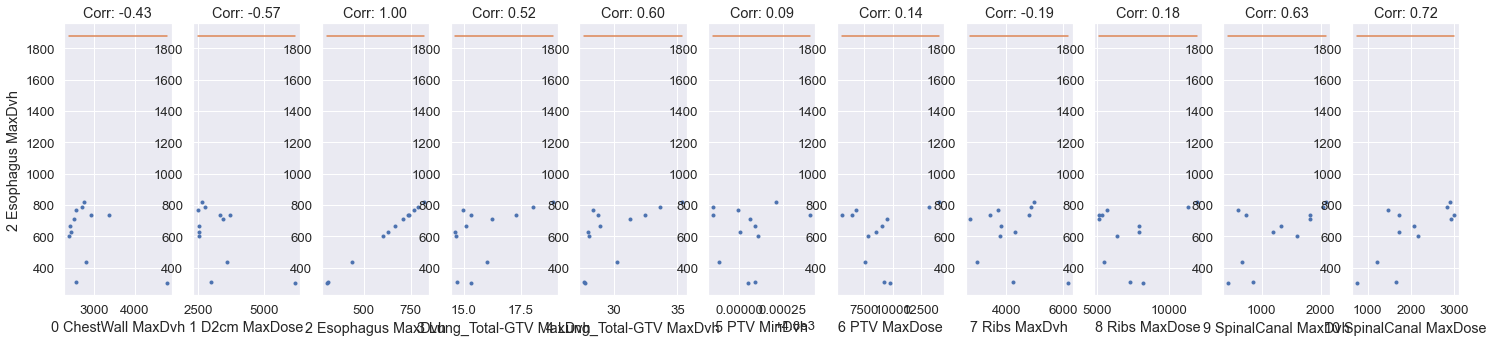

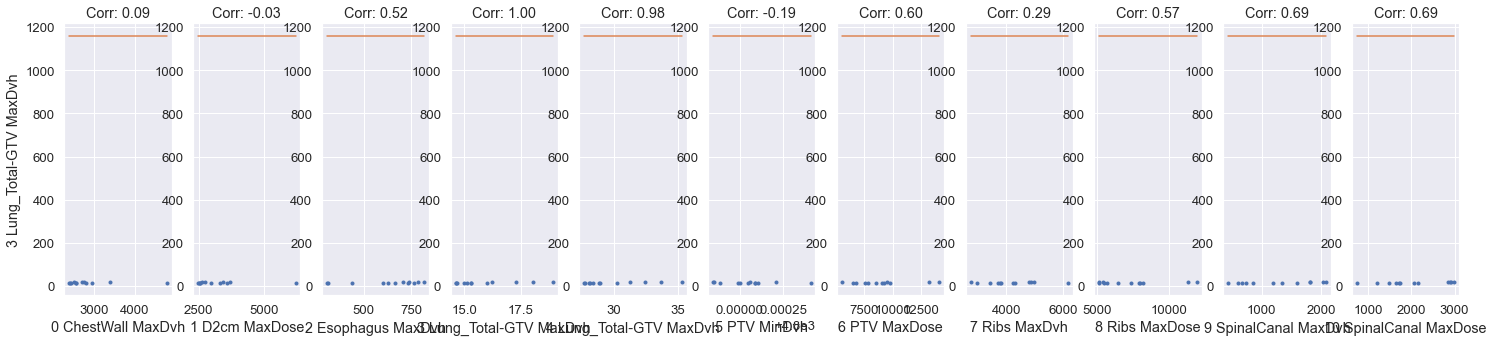

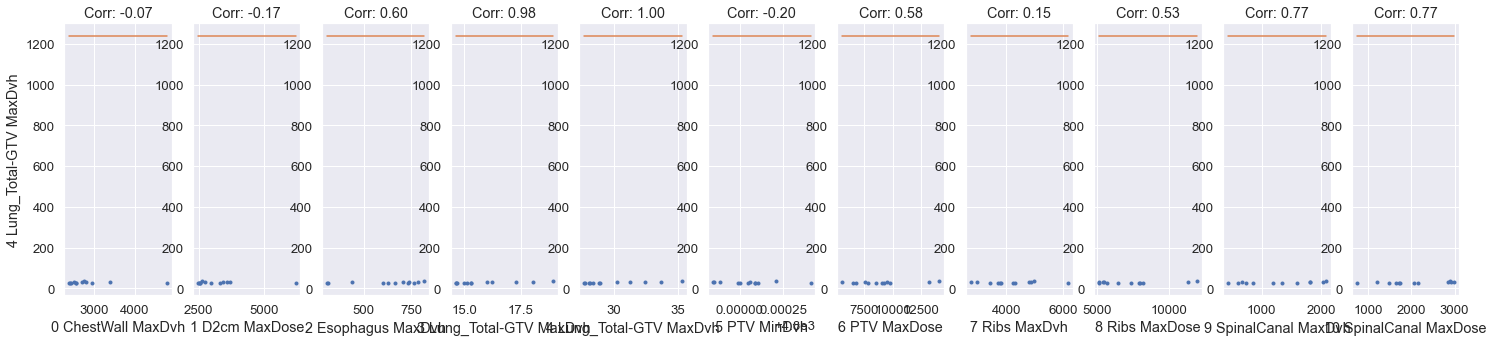

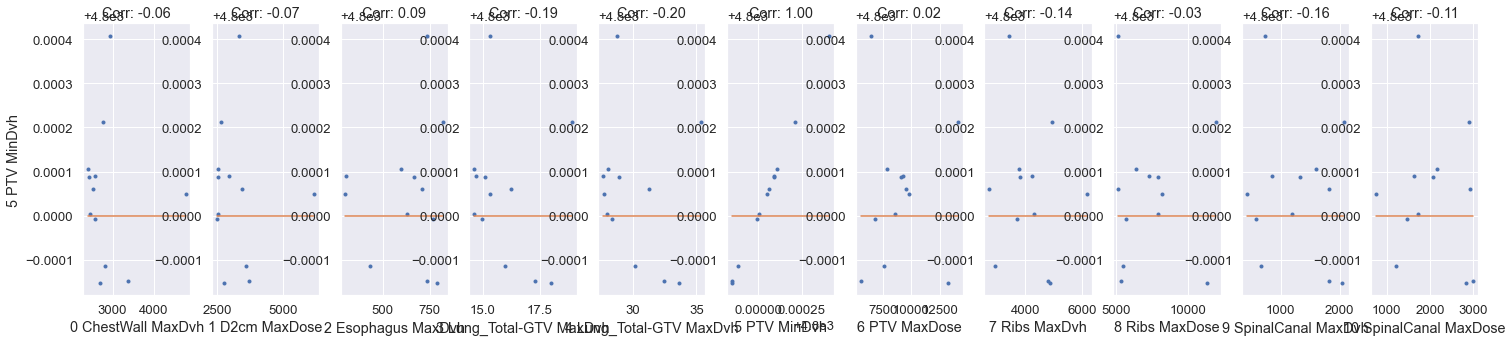

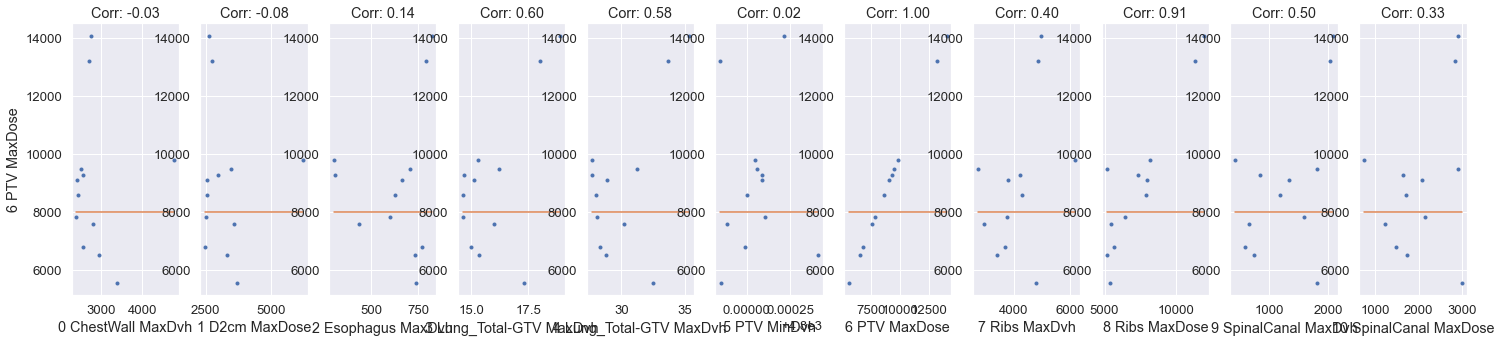

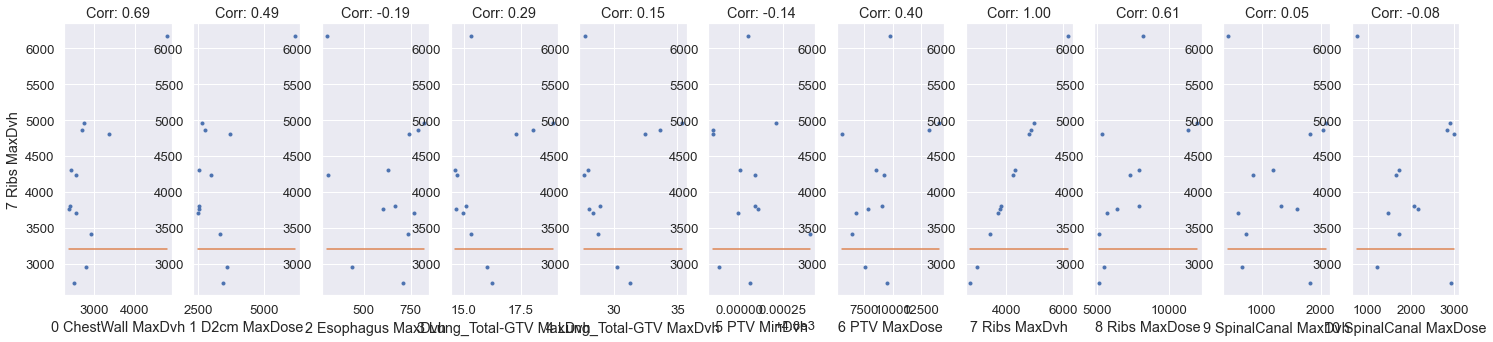

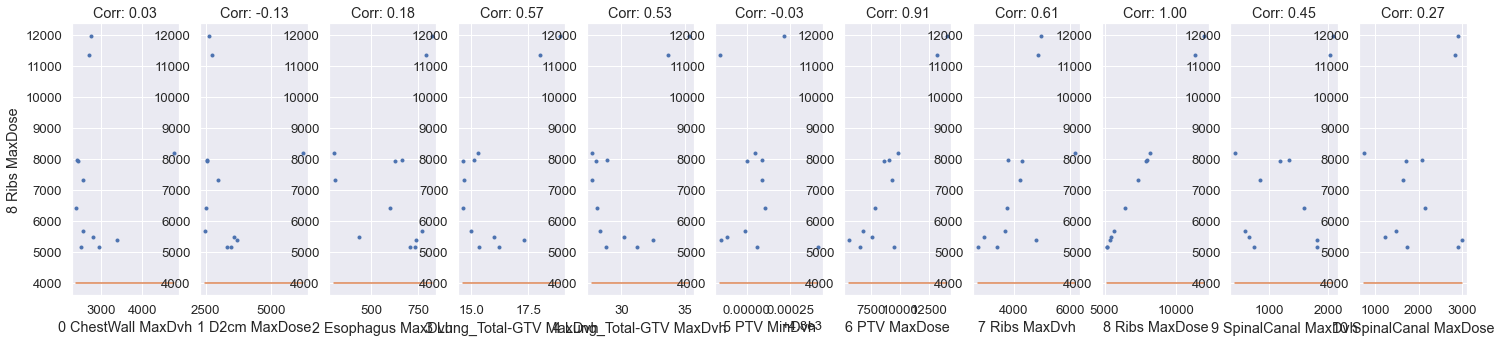

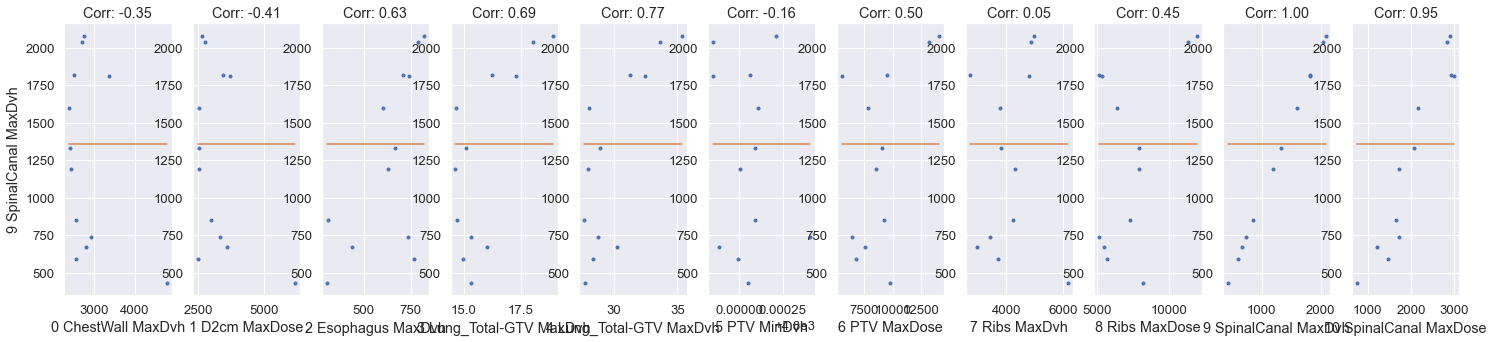

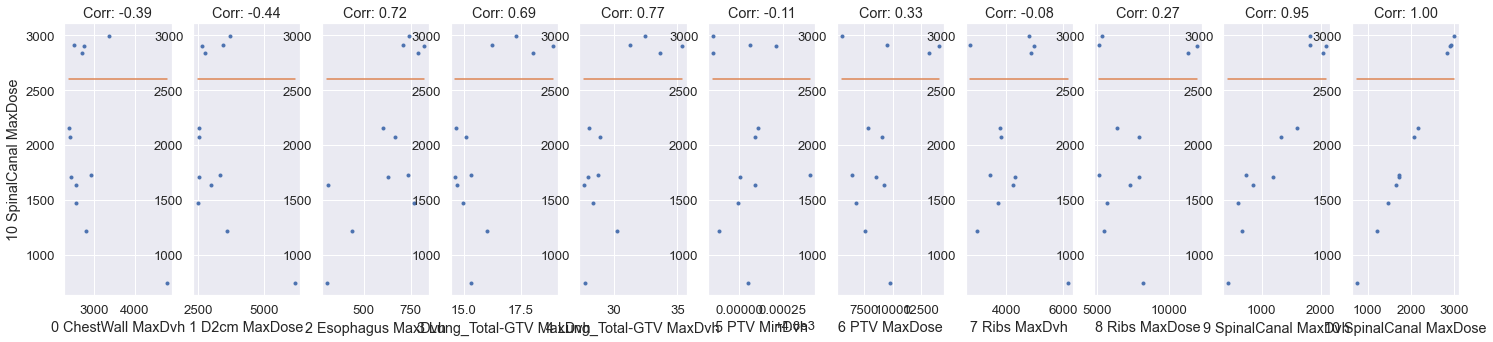

In [11]:
analyze.scatterplot(sample.goal_df, goal_dict)

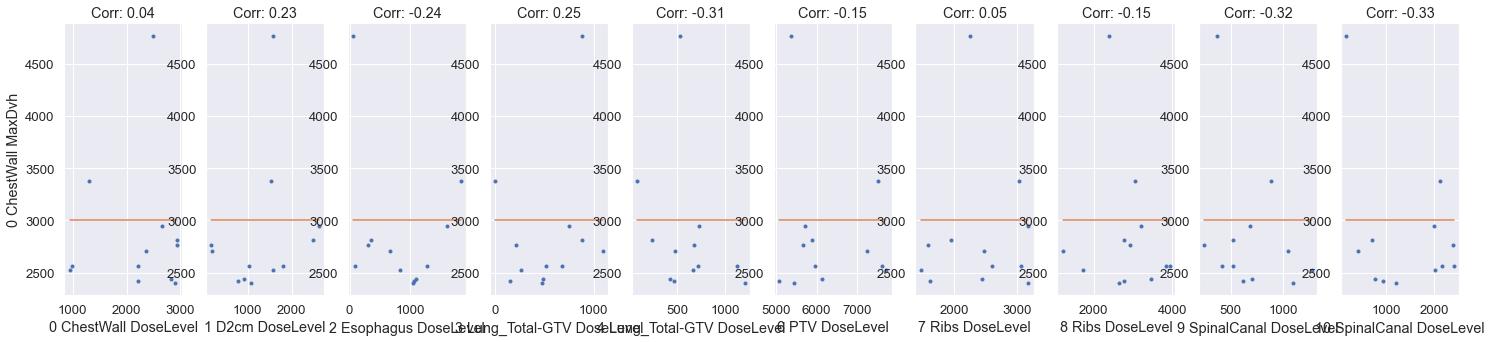

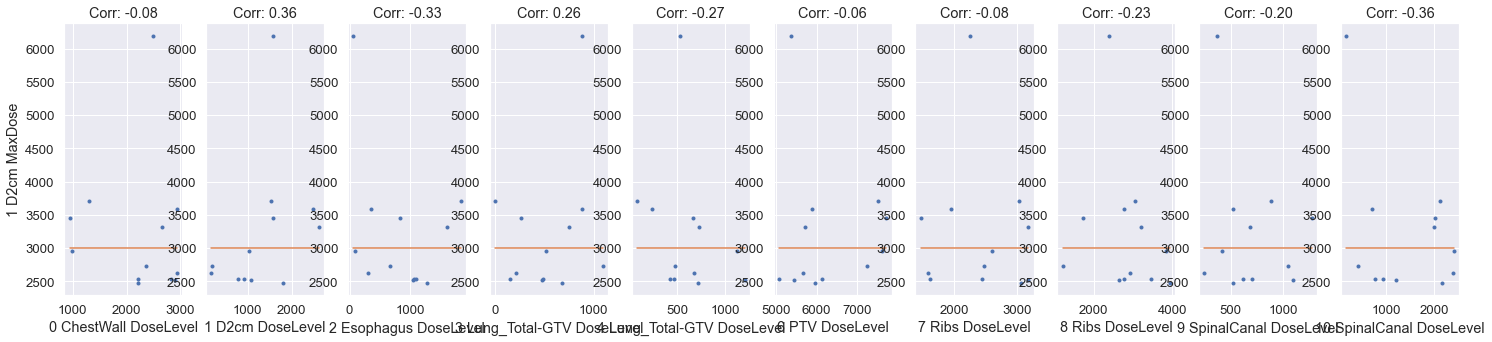

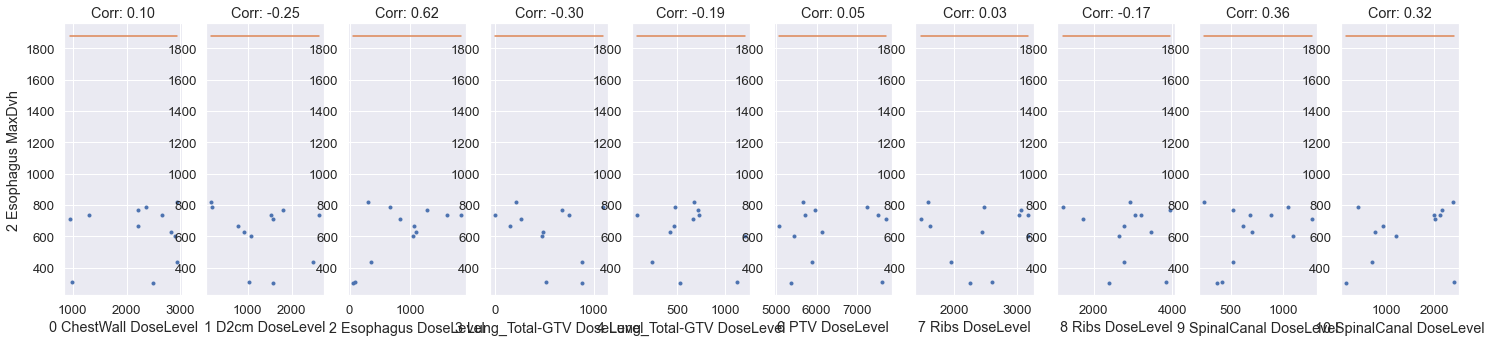

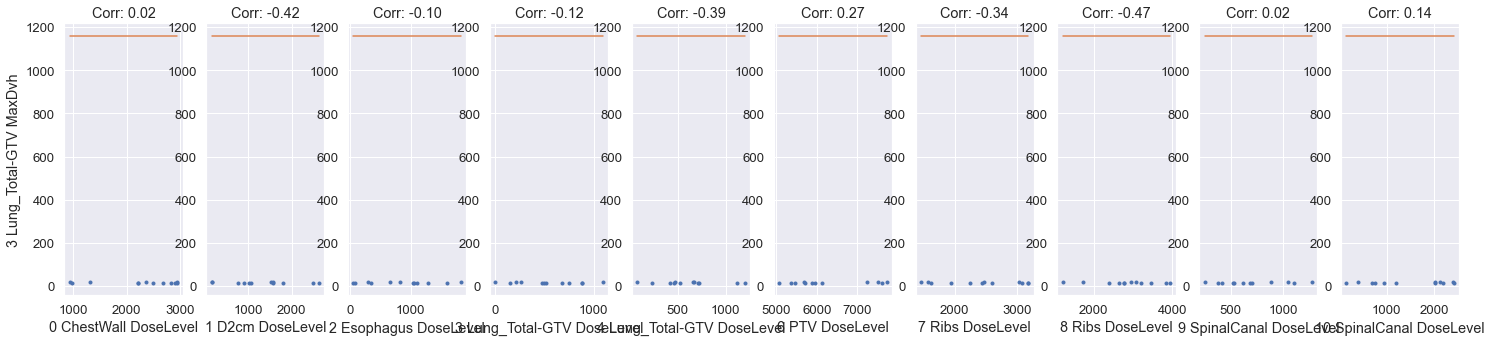

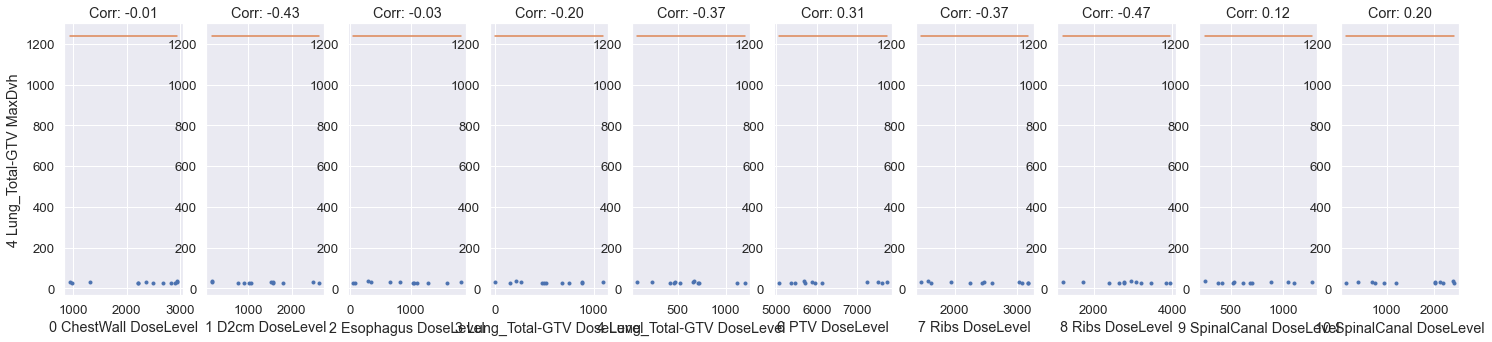

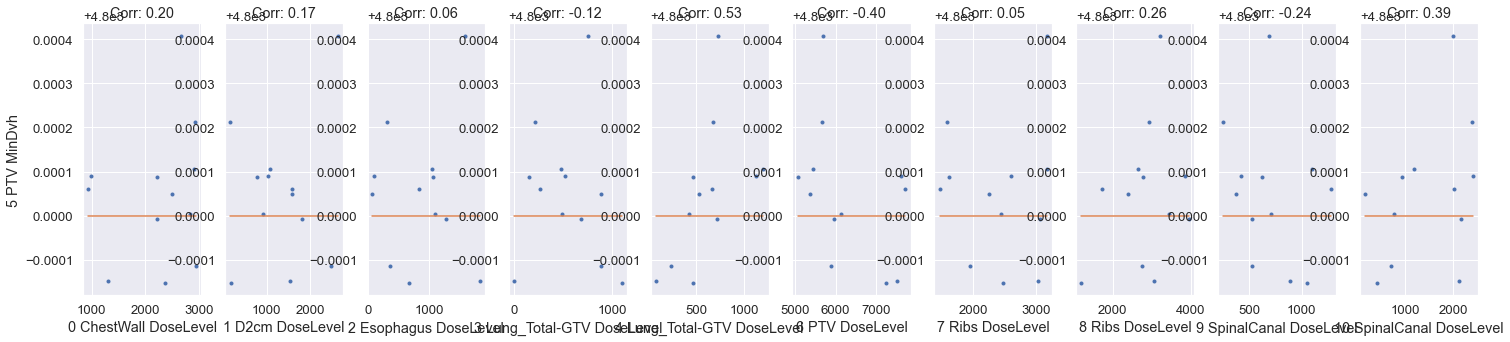

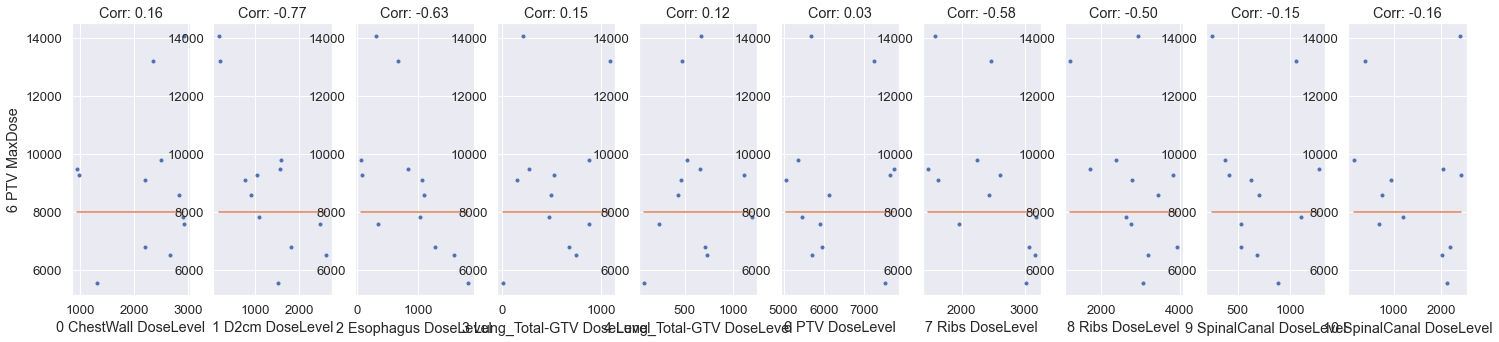

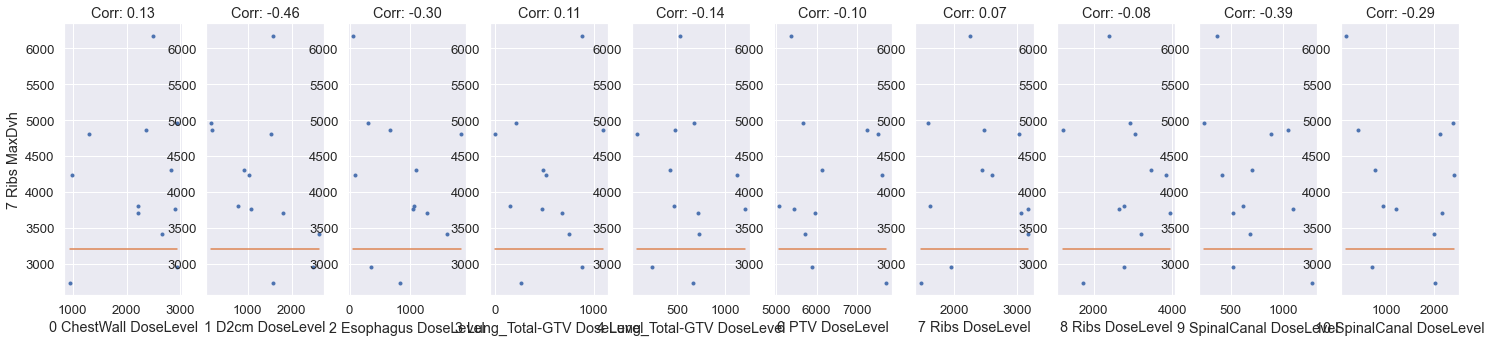

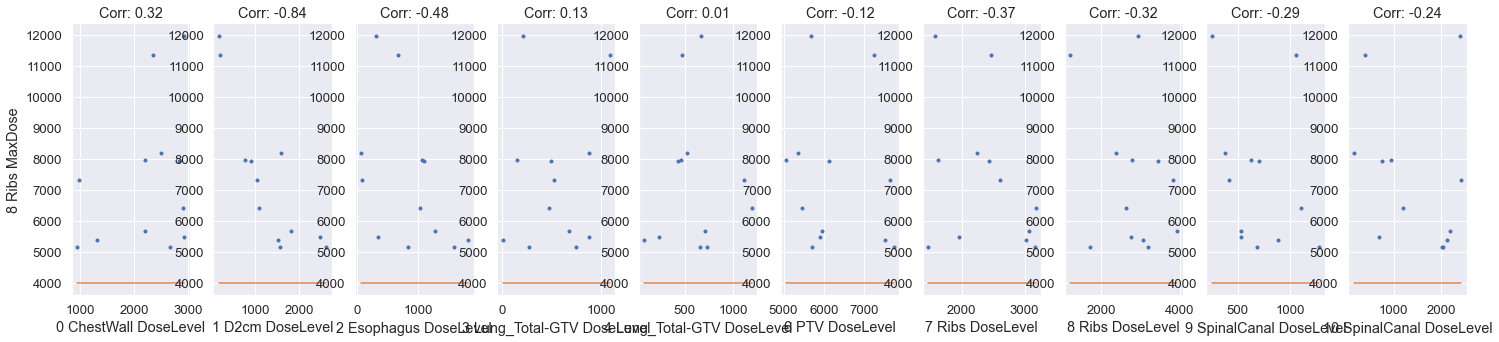

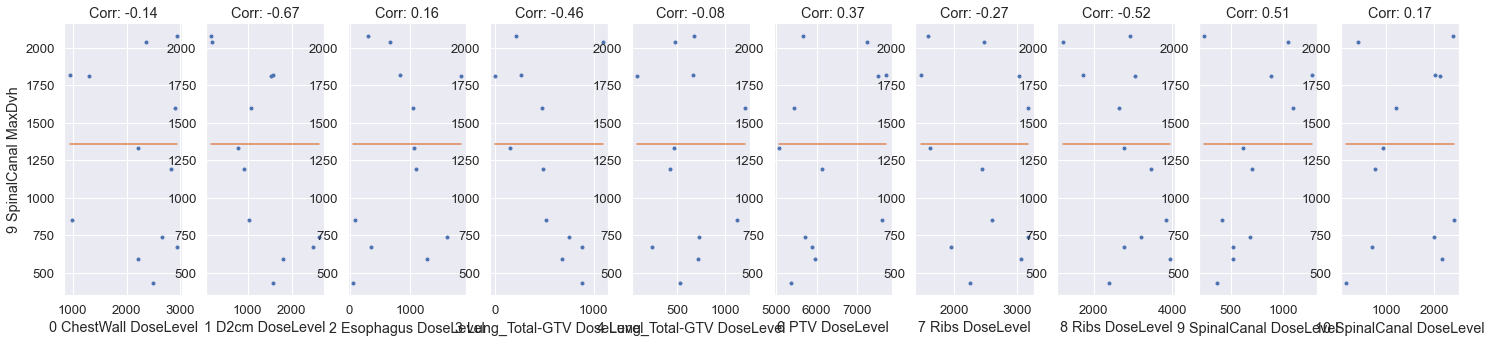

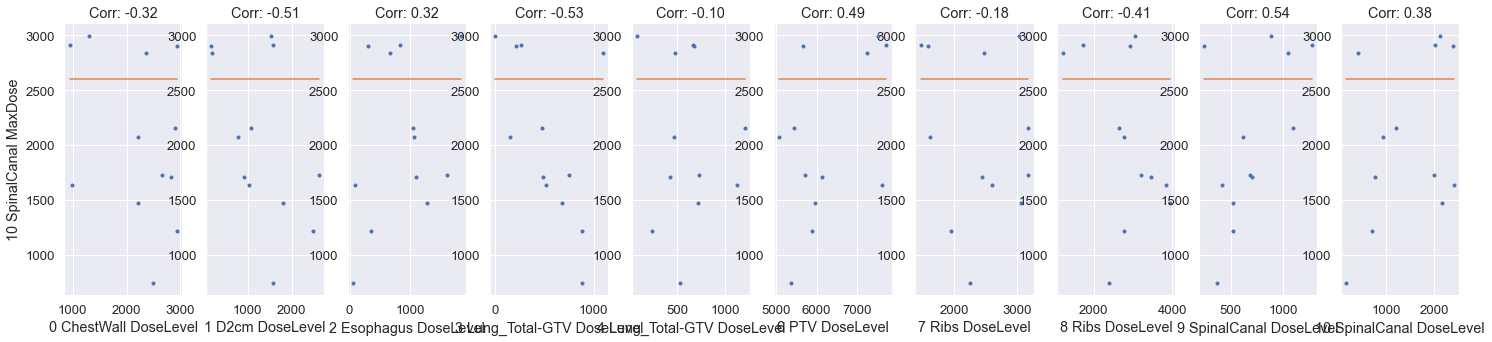

In [14]:
analyze.scatterplot(sample.goal_df, goal_dict, sample.func_df, par_list)

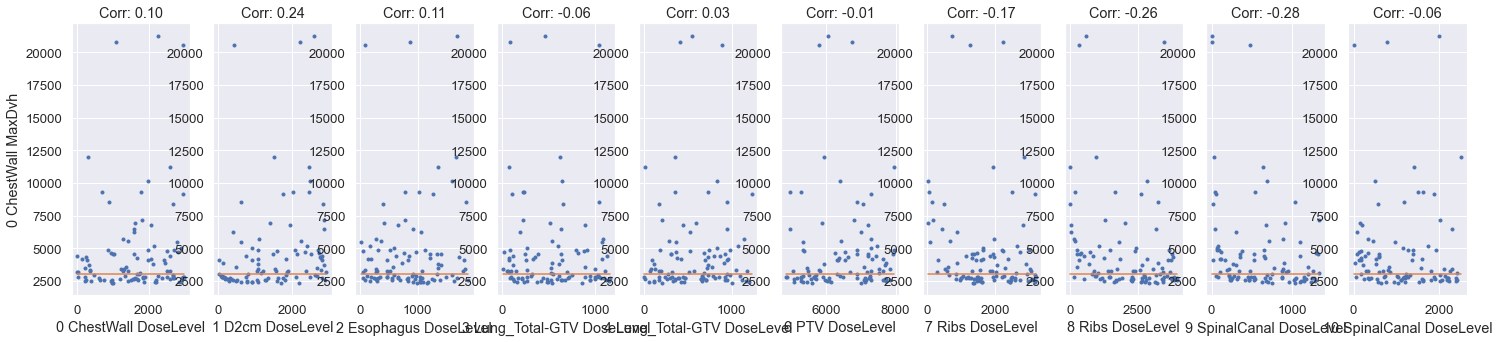

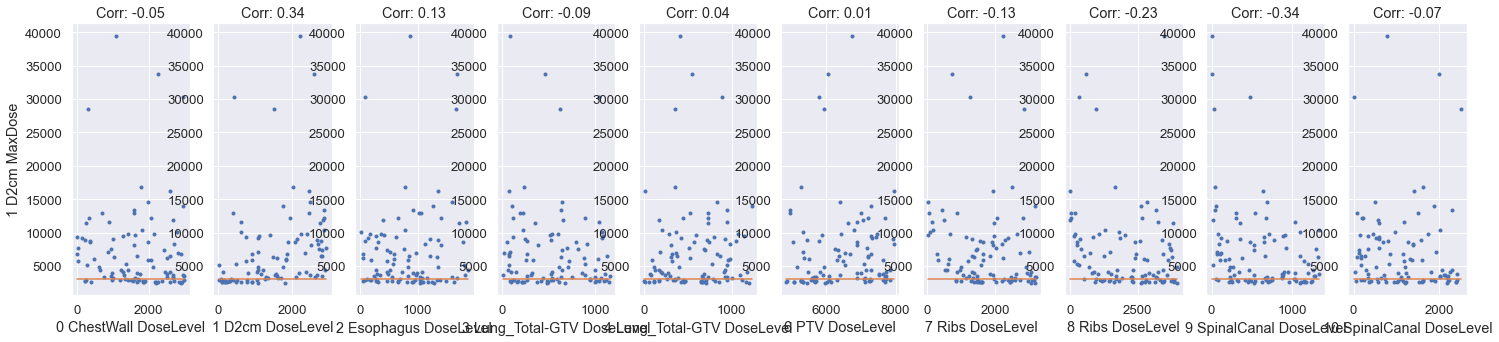

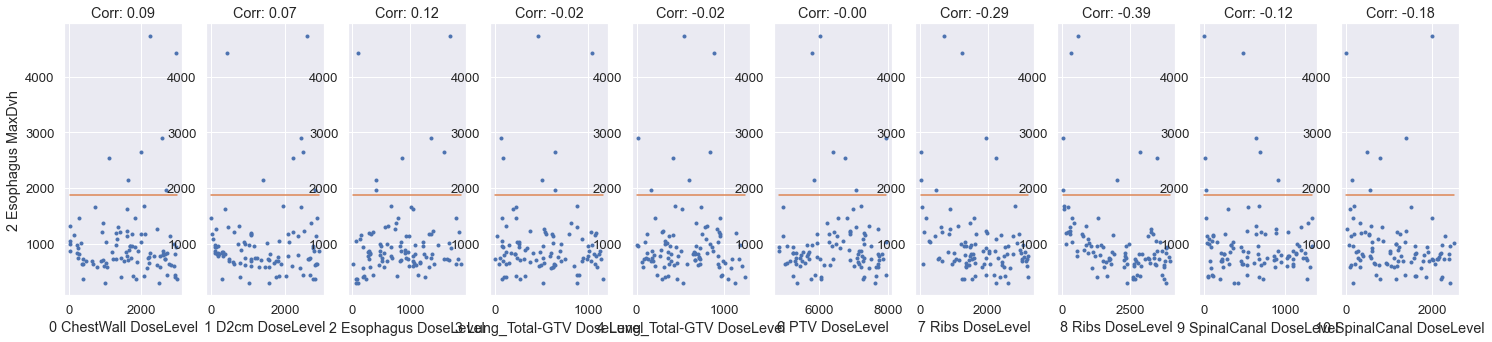

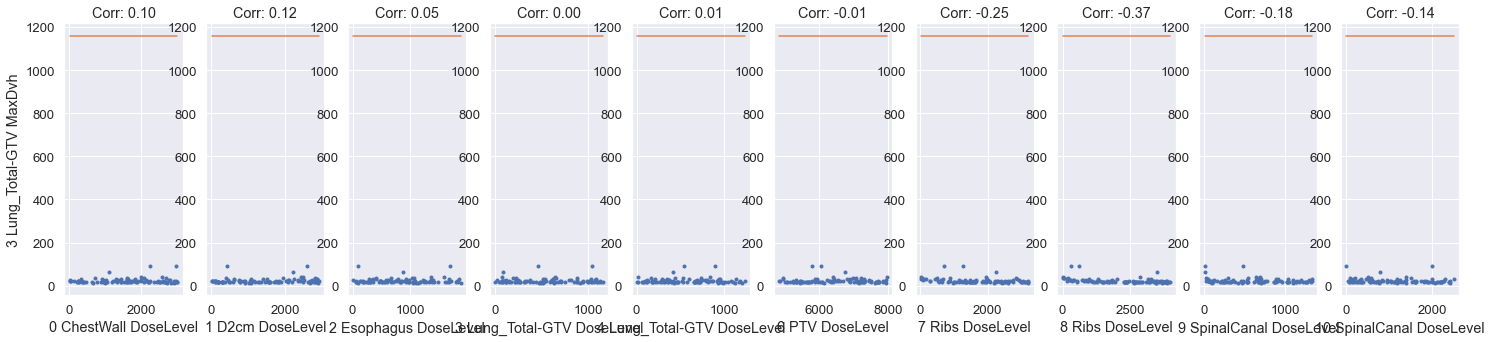

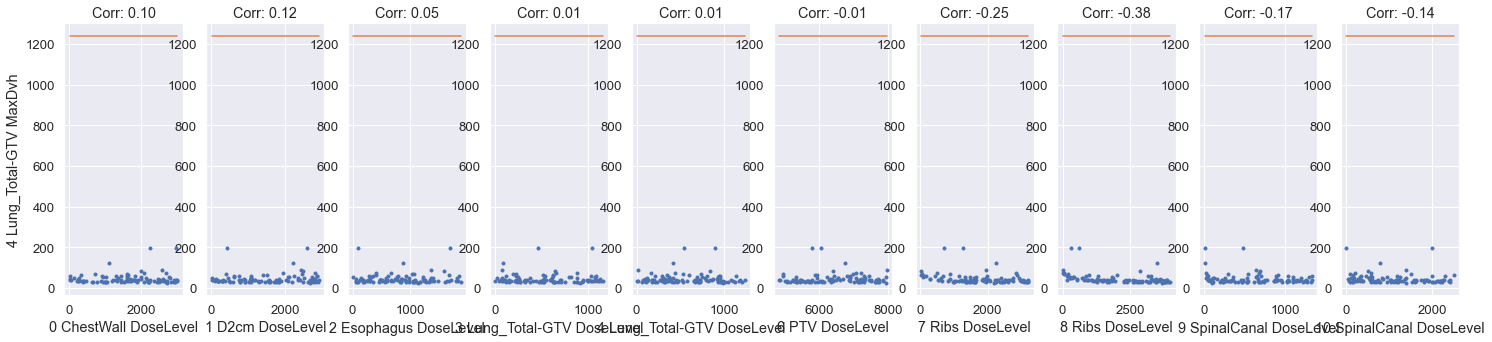

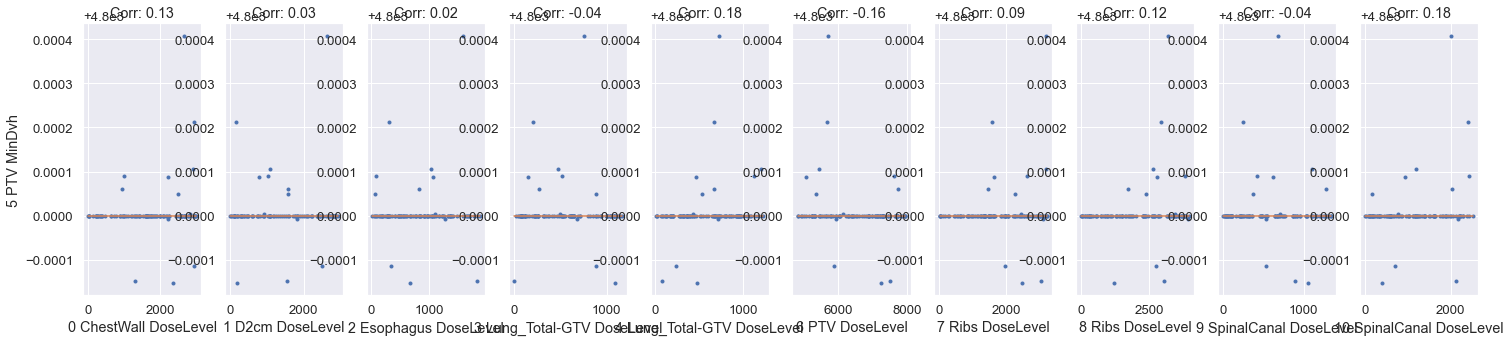

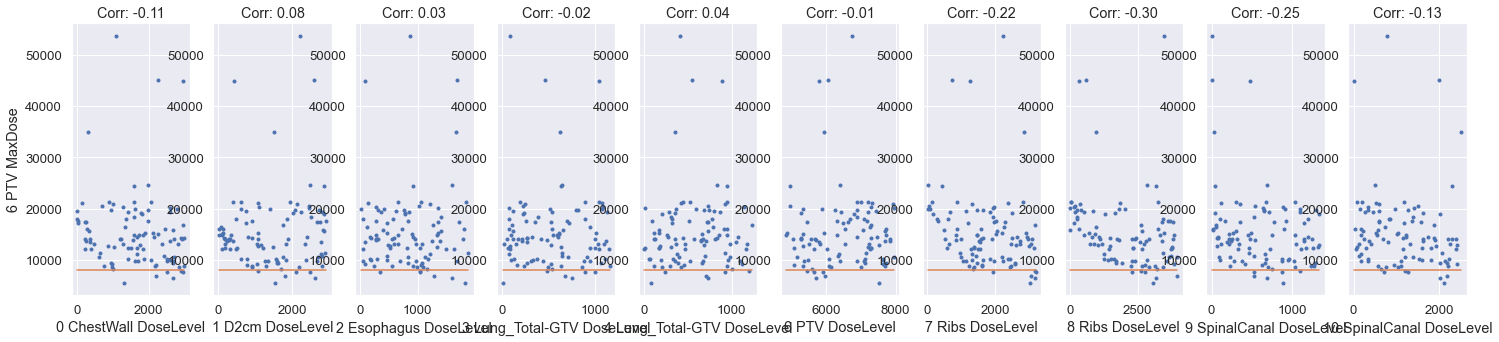

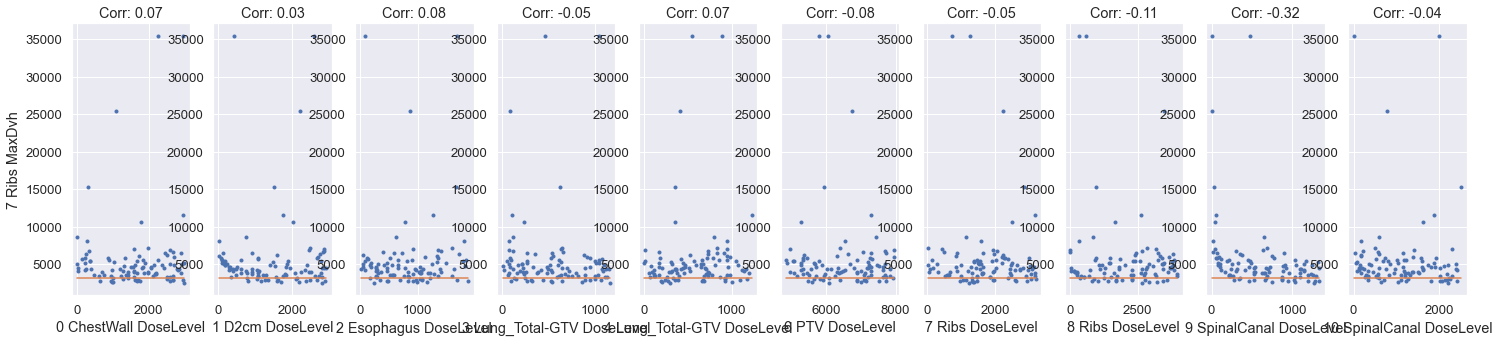

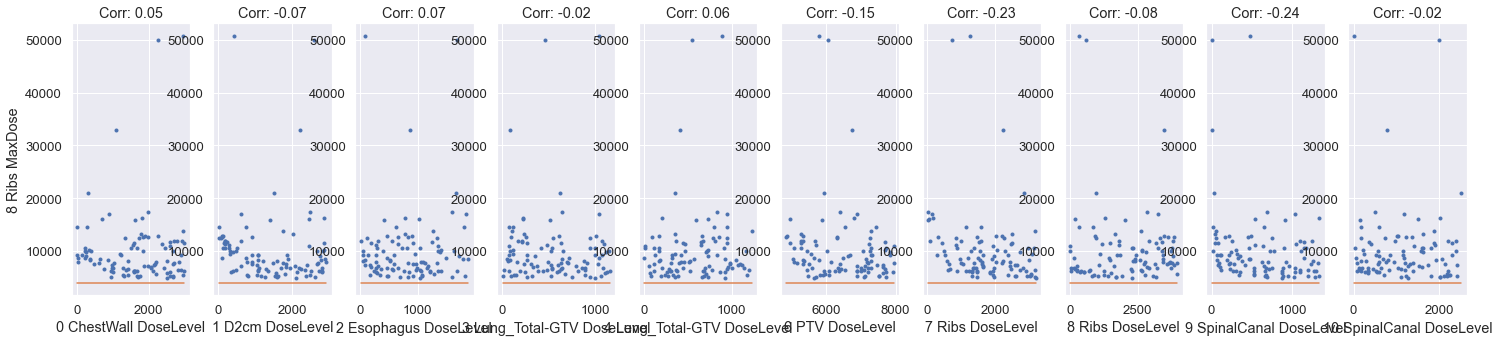

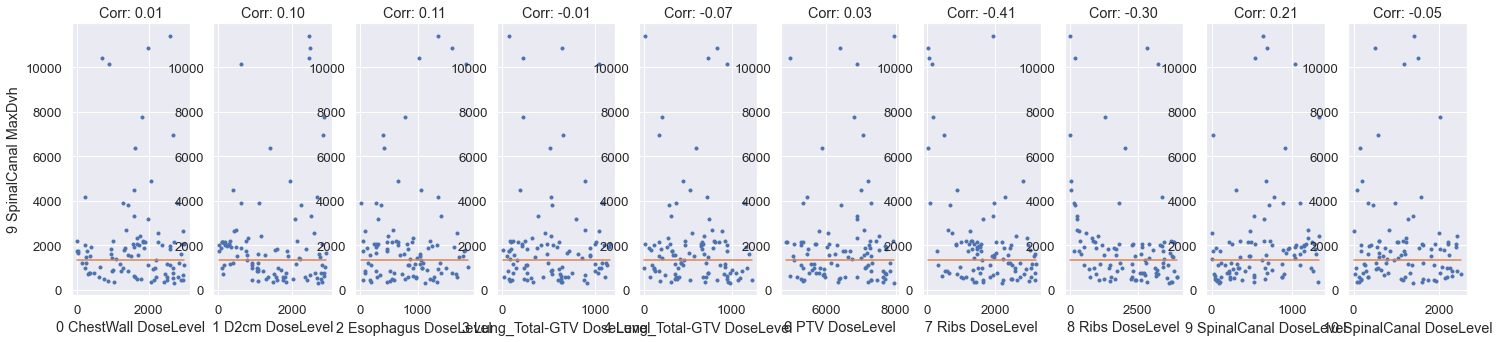

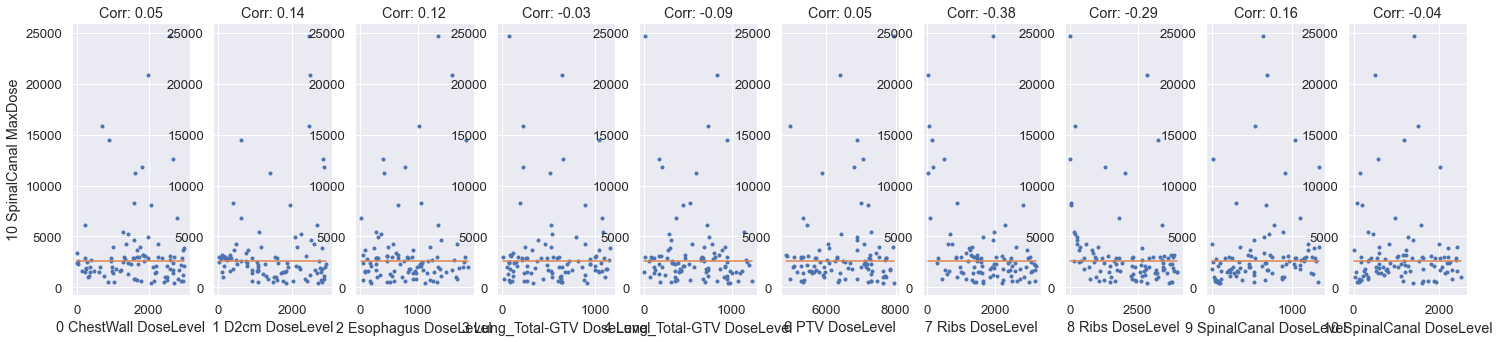

In [20]:
sample.scatterplot('pars')